## Project Title: 

### Technical Valuation in Real-Estate (Philadelphia Region)

## Creator: 

### Daniel Ramirez Jr.


## Abstract

With data & technical analysis becoming more powerful in the digital age, Real-Estate investors should be able to use fundamental ideologies and combine them with statistical tools to make sound investments. To provide a framework for these investors, this analysis used a dataset that contained variables pertaining to properties in the Philadelphia region. The data was cleansed and described using various different visualization methods such as bar charts, boxplots, and pie charts. Afterwards, the data was inputted into a linear regression model that was 56.02 % accurate (on test dataset) in predicting the tax assessed value of a property. The model found several variables to be significant in predicting this price on the test section of the dataset. Some of the variables include, but are not limited to, the number of bathrooms a property has, the Zillow Estimate (price estimate provided by the Real-Estate company Zillow).

## 1. Problem Introduction

For several generations in finance, fundamental analysis has been the prime method of assessing risks and making investment decisions. Fundamental analysis is a method of evaluating an asset and determining the intrinsic value by looking at the business, the industry, the entirety of current market events, and the domestic and global environment. After this, buying and selling decisions are made based on whether a property is trading at a discount or a premium to its fair value. A property’s value can be perceived as an opinion by many people, but the ability to defend the value is what makes the investment stronger.

However, as the digital-age matures, we are seeing more and more financial institutions leverage the use of structured/unstructured data to make decisions on what properties should be bought or sold. This can form of investing can be described as Technical analysis, of which does not consider the underlying asset or even the economics that impact the value of a property, but rather is driven by charts, price fluctuations, and finding trends to predict optimal purchasing/selling opportunities. The objective is not to predict the future, but to identify the most likely scenarios by analyzing market patterns and the effects of prevalent variables.

There is value in this project given that in order to compete in the free, captialistic market, investors must leverage the use of both fundamental and technical analysis to identify any risks an investment may present and then capture any short and long term trading opportunities. The objective of this project was to understand what variables are significant in predicting the price of a real-estate property in the Philadelphia Region. Understanding what variables impact price can be leverged to make positive investment decisions concurrently with fundamental strategies. 

## 2. Dataset

This section pertains to components of the dataset used.

### 2.1. Dataset Source


To achieve the objective, a 216Kb dataset from 2017 was used and taken from the following link on Kaggle.com:
https://www.kaggle.com/harry007/philly-real-estate-data-set-sample?select=Properties_philly_Kraggle_v2.csv

It is easily accessible and free for anybody to use, as long as one creates an account with Kaggle.

### 2.2. Dataset Description 

The dataset used included a 216Kb excel file that contains 30 columns and 615 rows, where each row pertains to a unique property in the region of Philadelphia, Pennsylvania. The columns consists of discrete, continous, and categorical data that decscribes unique characteristics of a certain property. From a preliminary perspective, it was believed that variables such as the amount of bedrooms, bathrooms, and property age, can impact the price of the real-estate property.

### 2.3. Variable Selection

The initial set of variables that might be siginifcant in explaining the price of a real-estate property, in the Philadelphia Region, is as follows:

- Postal Code (Identifier that pertains to the general location of a property. Philadelphia has several zipcodes)
- Property Type (Single Family/Townhouse/Condominium/Multi-Family)
- Finished Square Feet (Property Size)
- Amount of Bathrooms the propert has
- Amount of Bedrooms the property has
- Year Built (Will be used to determine age of the house)
- Sale Date of the property (Will be used to determine age of the house)
- Violent Crime Rate (Range to be determined)
- School Score (Range to be determined)
- Avg Walk & Transit score (Range to be determined)
- Sheriff Cost (Essentially the forclousre price)
- Opening Bid (First Offer)
- Zillow Estimate (Property Estimate from Real-Estate Tech Company)
- Tax Assessment (Property Estimate that is usually marked down from the market value price by a certain ratio)



### 2.4. Acquiring and Loading Data

In [75]:
#import the csv file from the folder in which it is located on ones computer
import pandas as pd
path = "C:/Users/Papi/Documents/INFO 212/Final Project/Philly_Properties.csv"
properties_df = pd.read_csv(path)
print()
print('The Dataframe has %i rows and %i columns.'%(properties_df.shape[0],properties_df.shape[1]))
print()
properties_df.head()



The Dataframe has 805 rows and 30 columns.



,Address,Zillow Address,Sale Date,Opening Bid,Sale Price/bid price,Book/Writ,OPA,Postal Code,Attorney,Ward,...,School Score,Zillow Estimate,Rent Estimate,taxAssessment,yearBuilt,finished \n(SqFt),bathrooms,bedrooms,PropType,Average comps
0,2327 E SERGEANT ST,"2327 E SERGEANT ST , Philadelphia, PA 19125",September 13 2016,11400.0,"$11,400",1609-412,314095100.0,19125.0,PHELAN HALLINAN LLP,31.0,...,15.87,"228,663.00","1,500.00","174,000.00",1921.0,898.0,1,2,SingleFamily,"240,254.55"
1,4466 TOLBUT ST,"4466 TOLBUT ST , Philadelphia, PA 19136",August 2 2016,8500.0,"$8,500",1606-339,652092800.0,19136.0,PARKER MCCAY,65.0,...,32.53,"141,579.00","1,200.00","119,700.00",1959.0,1120.0,1.5,3,Townhouse,"150,937.50"
2,134 E WALNUT LN,"134 E WALNUT LN , Philadelphia, PA 19144",August 2 2016,12600.0,"$12,600",1605-426,592058735.0,19144.0,PHELAN HALLINAN LLP,59.0,...,7.89,"186,172.00","1,500.00","190,300.00",2006.0,1882.0,3,3,SingleFamily,"225,483.33"
3,111 W ABBOTTSFORD AVE,"111 W ABBOTTSFORD AVE , Philadelphia, PA 19144",August 2 2016,9200.0,"$9,200",1607-317,123016300.0,19144.0,KML LAW GROUP,12.0,...,7.89,"168,557.00","1,400.00","118,300.00",1900.0,1792.0,1,4,SingleFamily,"135,755.56"
4,146 E DUVAL ST,"146 E DUVAL ST , Philadelphia, PA 19144",August 2 2016,8900.0,"$8,900",1605-510,592159100.0,19144.0,PHELAN HALLINAN LLP,59.0,...,7.89,"135,045.00","1,350.00","113,700.00",1925.0,1419.0,2,3,SingleFamily,"144,120.00"


## 3. Pre-Cleansing Data for Exploration
---

### 3.1. Renaming Variables and Removing Intances

The data was cleaned and removed of any non-essential columns/instances that do not add value to the analysis. For example, while the address of a property is important, it is not important to the model given that it is a unique string. What was used instead of a string was the "Postal Code" column that contains the categorical region of where the property is located.

In [76]:
#run once because the code is renaming variables in the dataframe

#filter the dataframe so that it only includes the relevant variables mentioned in section 1.1
properties_df = properties_df[['Postal Code','finished \n(SqFt)','PropType',' bathrooms ',' bedrooms ','yearBuilt','Sale Date',' Violent Crime Rate ',
                              ' School Score  ', ' Avg Walk&Transit score  ','Sheriff Cost','Opening Bid','Zillow Estimate','taxAssessment']]


#change the variable names so that they are easier to reference
properties_df = properties_df.rename(columns={"finished \n(SqFt)": "Size_SqFt", " bathrooms ": "bathrooms"," bedrooms ": "bedrooms"," Violent Crime Rate ": "Crime_Rate_V", " Avg Walk&Transit score  ": "Walk_Transit_Score"," School Score  ": "School_Score"})



In [77]:
print()
print('The Dataframe has %i rows and %i columns.'%(properties_df.shape[0],properties_df.shape[1]))
print()
properties_df.head()



The Dataframe has 805 rows and 14 columns.



,Postal Code,Size_SqFt,PropType,bathrooms,bedrooms,yearBuilt,Sale Date,Crime_Rate_V,School_Score,Walk_Transit_Score,Sheriff Cost,Opening Bid,Zillow Estimate,taxAssessment
0,19125.0,898.0,SingleFamily,1,2,1921.0,September 13 2016,1.13,15.87,82.25,1314.10,11400.0,"228,663.00","174,000.00"
1,19136.0,1120.0,Townhouse,1.5,3,1959.0,August 2 2016,0.35,32.53,65.25,1254.05,8500.0,"141,579.00","119,700.00"
2,19144.0,1882.0,SingleFamily,3,3,2006.0,August 2 2016,0.86,7.89,71.75,1337.33,12600.0,"186,172.00","190,300.00"
3,19144.0,1792.0,SingleFamily,1,4,1900.0,August 2 2016,0.86,7.89,71.75,1459.76,9200.0,"168,557.00","118,300.00"
4,19144.0,1419.0,SingleFamily,2,3,1925.0,August 2 2016,0.86,7.89,71.75,1263.36,8900.0,"135,045.00","113,700.00"


In [78]:
#keep the rows that have NA amounts that are less than or equal to 2
properties_df = properties_df[properties_df.isnull().sum(axis=1) <= 2]

print()
print('The Dataframe has %i rows and %i columns.'%(properties_df.shape[0],properties_df.shape[1]))
print()

properties_df.head()



The Dataframe has 615 rows and 14 columns.



,Postal Code,Size_SqFt,PropType,bathrooms,bedrooms,yearBuilt,Sale Date,Crime_Rate_V,School_Score,Walk_Transit_Score,Sheriff Cost,Opening Bid,Zillow Estimate,taxAssessment
0,19125.0,898.0,SingleFamily,1,2,1921.0,September 13 2016,1.13,15.87,82.25,1314.10,11400.0,"228,663.00","174,000.00"
1,19136.0,1120.0,Townhouse,1.5,3,1959.0,August 2 2016,0.35,32.53,65.25,1254.05,8500.0,"141,579.00","119,700.00"
2,19144.0,1882.0,SingleFamily,3,3,2006.0,August 2 2016,0.86,7.89,71.75,1337.33,12600.0,"186,172.00","190,300.00"
3,19144.0,1792.0,SingleFamily,1,4,1900.0,August 2 2016,0.86,7.89,71.75,1459.76,9200.0,"168,557.00","118,300.00"
4,19144.0,1419.0,SingleFamily,2,3,1925.0,August 2 2016,0.86,7.89,71.75,1263.36,8900.0,"135,045.00","113,700.00"


### 3.2.  Altering Variable Data Types & Filtering Out Instances
This analysis will only include relevant postal codes, of which this model will assumes that it pertains to the most frequent postal codes located in the dataset. Ideally, the model will receive at least 20 instances for each area code. 

In [79]:
#Identify the datatypes of the variables being used in the analysis

print('Data Types:\n')
for c in properties_df:
    print(c,':',properties_df[c].dtype)


Data Types:

Postal Code : float64
Size_SqFt : float64
PropType : object
bathrooms : object
bedrooms : object
yearBuilt : float64
Sale Date : object
Crime_Rate_V : float64
School_Score : float64
Walk_Transit_Score : float64
Sheriff Cost : float64
Opening Bid : float64
Zillow Estimate : object
taxAssessment : object


In [80]:
#convert the estimate values into strings so that the comma can be removed and coverted into a float    
properties_df['taxAssessment'] = properties_df['taxAssessment'].astype('str')
properties_df['Zillow Estimate'] = properties_df['Zillow Estimate'].astype('str')

properties_df['taxAssessment'] = properties_df['taxAssessment'].str.replace(',', '').astype(float)
properties_df['Zillow Estimate'] = properties_df['Zillow Estimate'].str.replace(',', '').astype(float)


#convert bedrooms and bathrooms into integers and floats, respectively
#first convert from object to string then to integers and floats

remove_null = ' -   '
properties_df['bedrooms'] = properties_df['bedrooms'].astype(str)
properties_df['bedrooms'] = properties_df['bedrooms'].str.replace(remove_null, '0').astype(int)


properties_df['bathrooms'] = properties_df['bathrooms'].astype(str)
properties_df['bathrooms'] = properties_df['bathrooms'].str.replace(remove_null, '0').astype(float)



#convert the postal code variable into an object
properties_df['Postal Code'] = properties_df['Postal Code'].astype(int)


#assign the V-values to a list variable to reference later for descriptive and predicitve analytics
y_variable = properties_df['taxAssessment'].tolist()


properties_df.head()

,Postal Code,Size_SqFt,PropType,bathrooms,bedrooms,yearBuilt,Sale Date,Crime_Rate_V,School_Score,Walk_Transit_Score,Sheriff Cost,Opening Bid,Zillow Estimate,taxAssessment
0,19125,898.0,SingleFamily,1.0,2,1921.0,September 13 2016,1.13,15.87,82.25,1314.10,11400.0,228663.0,174000.0
1,19136,1120.0,Townhouse,1.5,3,1959.0,August 2 2016,0.35,32.53,65.25,1254.05,8500.0,141579.0,119700.0
2,19144,1882.0,SingleFamily,3.0,3,2006.0,August 2 2016,0.86,7.89,71.75,1337.33,12600.0,186172.0,190300.0
3,19144,1792.0,SingleFamily,1.0,4,1900.0,August 2 2016,0.86,7.89,71.75,1459.76,9200.0,168557.0,118300.0
4,19144,1419.0,SingleFamily,2.0,3,1925.0,August 2 2016,0.86,7.89,71.75,1263.36,8900.0,135045.0,113700.0


In [81]:
#What postal codes appear the most in the dataset and then plot the relevant information for those selected 

#filtering data
postal_frequencies = properties_df.groupby(["Postal Code"]).size().reset_index(name='counts')
postal_frequencies = postal_frequencies.loc[postal_frequencies['counts'] >=20]
postal_frequencies

#get the data and put it into a list that will be referenced when matching the row values in the master dataset  
postal_codes_list = postal_frequencies['Postal Code'].tolist()
postal_codes_list.sort()

#exclude the rows that pertain to a postal code that is not in the list
properties_df = properties_df[properties_df['Postal Code'].isin(postal_codes_list)]

#assign the V-values to a list variable to reference later for descriptive and predicitve analytics
y_variable = properties_df['taxAssessment'].tolist()

properties_df.head()

,Postal Code,Size_SqFt,PropType,bathrooms,bedrooms,yearBuilt,Sale Date,Crime_Rate_V,School_Score,Walk_Transit_Score,Sheriff Cost,Opening Bid,Zillow Estimate,taxAssessment
2,19144,1882.0,SingleFamily,3.0,3,2006.0,August 2 2016,0.86,7.89,71.75,1337.33,12600.0,186172.0,190300.0
3,19144,1792.0,SingleFamily,1.0,4,1900.0,August 2 2016,0.86,7.89,71.75,1459.76,9200.0,168557.0,118300.0
4,19144,1419.0,SingleFamily,2.0,3,1925.0,August 2 2016,0.86,7.89,71.75,1263.36,8900.0,135045.0,113700.0
7,19131,1354.0,SingleFamily,1.0,3,1925.0,October 4 2016,0.29,8.34,65.75,1286.45,10000.0,155873.0,114800.0
9,19142,992.0,Condominium,1.0,3,1925.0,October 4 2016,0.84,7.28,76.50,1412.47,7100.0,96713.0,70500.0


## 4. Exploring and Visualizing Data

Before any statistical analysis was completed, it was necessary to explore the dataset in hopes of finding any connections between the properties and variables. 

### 4.1. Property Type & Tax Assessed Value

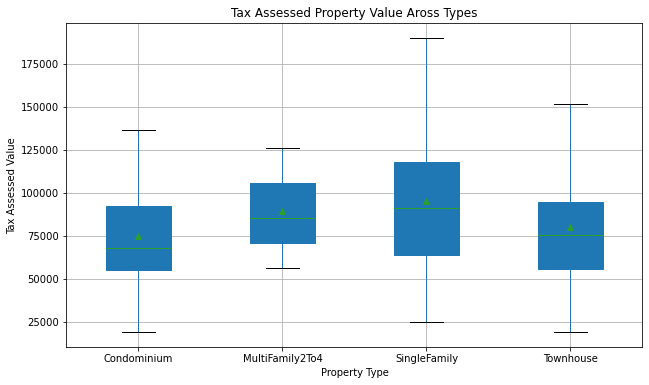

In [49]:
import matplotlib.pyplot as plt
import numpy as np

#whisker plots allow us to see the distribution among the tax assessed properties

property_value_dist = properties_df.boxplot(by ='PropType', column =['taxAssessment'], patch_artist=True, grid = True,showfliers=False,showmeans=True);
property_value_dist.set_title('Tax Assessed Property Value Aross Types');
plt.suptitle("")
property_value_dist.set_xlabel('Property Type');
property_value_dist.set_ylabel('Tax Assessed Value');
plt.rcParams["figure.figsize"] = [10, 6]



It is important to understand the relationship between a property's value and its structure. From the dataset it is clear that Single Family properties have the highest Tax Assessed Median Value, followed closly by Multi-Family properties. However, the range at Multi-Family property values is signficantly shorter than that of Singe Family homes. The remaining two are Townhouses and Condominiums, respectively. Moreover, the average tax asssessed property value for each property type is slightly above its median, indidcating that the data is consistent among the property types (no  significant outliers).

### 4.2. Property Type Across Postal Areas

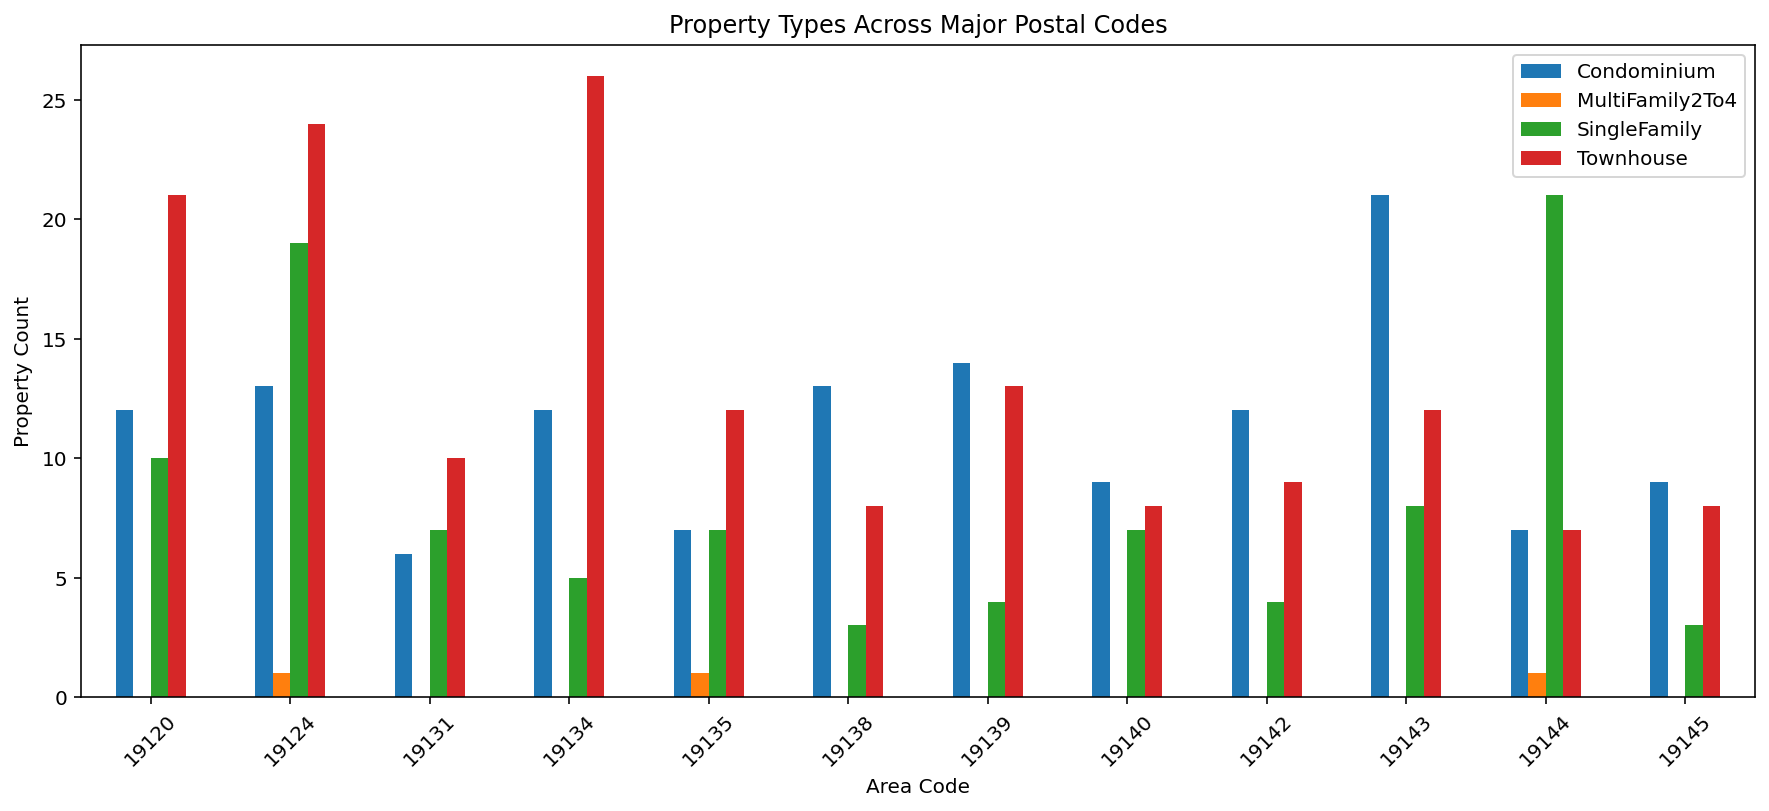

In [377]:
#Postal Code and its corresponding Property Type
#unstack is a tool to convert the groupby results into a dataframe
area_prop_types = properties_df.groupby(["Postal Code","PropType"]).size().unstack()

#Fill the values
area_prop_types = area_prop_types.fillna(0)

condominium = area_prop_types['Condominium'].tolist()
multi_family = area_prop_types['MultiFamily2To4'].tolist()
Single_family = area_prop_types['SingleFamily'].tolist()
Townhouse = area_prop_types['Townhouse'].tolist()

#convert into integer to remove float
postal_list_string = [int(x) for x in postal_codes_list]

#create the dataframe

area_dict = {'Condominium': condominium, 'MultiFamily2To4': multi_family, 'SingleFamily': Single_family,'Townhouse':Townhouse} 
    
postal_df = pd.DataFrame(area_dict)

plt.rcParams["figure.figsize"] = [15, 6]

# Set up with a higher resolution screen
%config InlineBackend.figure_format = 'retina'

#plot the graph
postal_df.plot(kind='bar')


plt.title('Property Types Across Major Postal Codes');
plt.xlabel('Area Code');
plt.ylabel('Property Count');

ticks = range(0,len(postal_list_string))
plt.xticks(ticks, postal_list_string);
plt.xticks(rotation=45);



From the bargraph above, it is clear that the most common property type, across all postal codes, is the Townhouse. Moreover, postal code 19134 contained the most amount of Townhouses with over 25. In addition, area code 19143 has the most Condominium properties with over 20. Also, postal code 19144 had the most Single Family properties with over 20. Based on the information in the previous boxplot, it could be expected that the 19144 could contain the wealthiest properties. Finally, it is important to note that the only postal codes with Multi-Family properties were: 19124 ,19135 ,19144. Perhaps, there is some type of law restrictions in these postal codes that make it difficult to build and manage those type of properties.

### 4.3. Correlations Among Tax Assessed Value


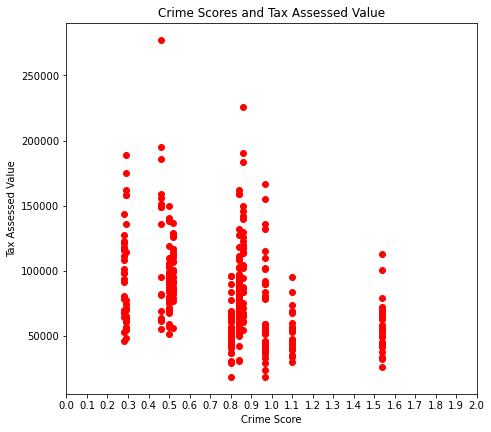

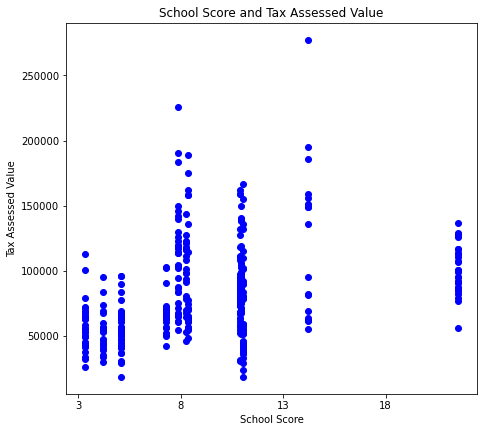

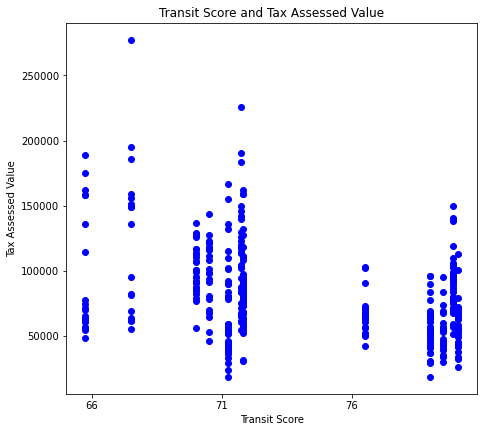

In [56]:
#plot the correlation graphs

#plot1 code
fig = plt.figure(figsize=(25,15))

plt.subplot(2,3,1) 
plt.scatter(crime_rate_list, y_variable, c ="red");
plot1_ticks = [a for a in np.arange(0.0,2.1,0.1)]
plt.xticks(plot1_ticks);

plt.title('Crime Scores and Tax Assessed Value');
plt.xlabel('Crime Score');
plt.ylabel('Tax Assessed Value');


#plot2 code
fig = plt.figure(figsize=(25,15))

plt.subplot(2,3,2) 
plt.scatter(school_score_list, y_variable, c ="blue");
plot2_ticks = [a for a in np.arange(round(min(school_score_list),0),max(school_score_list),5)]
plt.xticks(plot2_ticks);

plt.title('School Score and Tax Assessed Value');
plt.xlabel('School Score');
plt.ylabel('Tax Assessed Value');


#plot3 code
fig = plt.figure(figsize=(25,15))

plt.subplot(2,3,3) 
plt.scatter(transportation_score_list, y_variable, c ="blue");
plot3_ticks = [a for a in np.arange(round(min(transportation_score_list),0),max(transportation_score_list),5)]
plt.xticks(plot3_ticks);

plt.title('Transit Score and Tax Assessed Value');
plt.xlabel('Transit Score');
plt.ylabel('Tax Assessed Value');



In [82]:
#calculate correlation and display
import scipy.stats

print()
print('Correlations Between Tax Assessed Property Values and Relevant Measures:')
print('------------------------------------------------------------------------\n')

#create list of the numeric data so that correlation can be calculated in respect to tax assessed value
crime_rate_list = properties_df['Crime_Rate_V'].tolist()
school_score_list = properties_df['School_Score'].tolist()
transportation_score_list = properties_df['Walk_Transit_Score'].tolist()

#correlation between crime score and y variable
correlation1 = scipy.stats.spearmanr(crime_rate_list, y_variable)[0]

print('Correlation between crime and tax assessed property value is %f'%(round(correlation1,2)))
print()

correlation2 = scipy.stats.spearmanr(school_score_list, y_variable)[0]
print('Correlation between School Scores and tax assessed property value is %f'%(round(correlation2,2)))
print()


correlation3 = scipy.stats.spearmanr(transportation_score_list, y_variable)[0]
print('Correlation between Transit Scores and tax assessed property value is %f'%(round(correlation3,2)))
print()


Correlations Between Tax Assessed Property Values and Relevant Measures:
------------------------------------------------------------------------

Correlation between crime and tax assessed property value is -0.350000

Correlation between School Scores and tax assessed property value is 0.370000

Correlation between Transit Scores and tax assessed property value is -0.300000



There seems to be a correlation of -0.35 which means that there is a moderate, negative relationship between Crime Scores and Tax Assessed Property Values. As Crime Scores increase, Tax Assessed Property Values tend to fall. Perhaps people are willing to pay less to live in a non-safe area. 

Moreover, there is a correlation of 0.37 which means that there is a moderate, positive relationship between School Scores and Tax Assessed Property Values. As School Scores increase, Tax Assessed Property Values tend to Rise. Perhaps people are willing to pay more to live in an area where the education system is better.

Finally,  correlation of -0.30 which means that there is a moderate, negative relationship between Transit Scores and Tax Assessed Property Values. As Transit Scores increase, Tax Assessed Property Values tend to fall. Perhaps, a location that is central could mean a busy area and people may want to pay less for that. 


### 4.4. School and Crime Scores Across Postal Areas


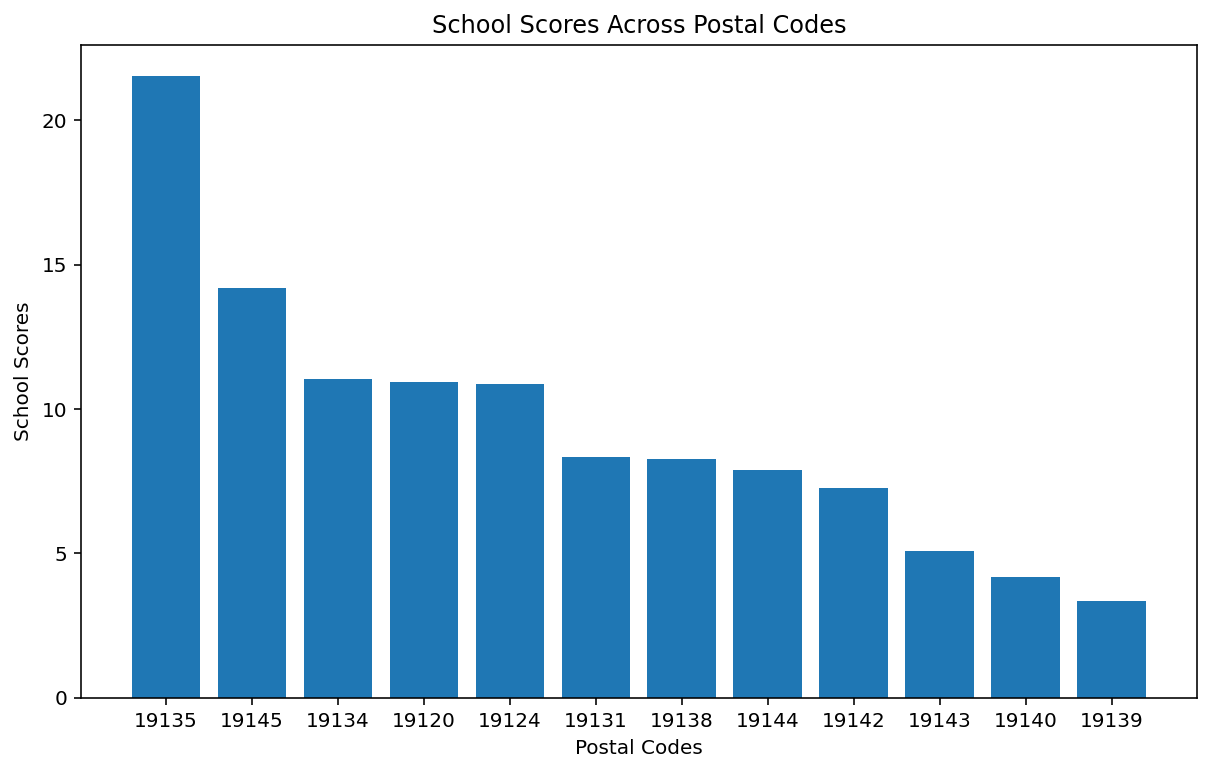

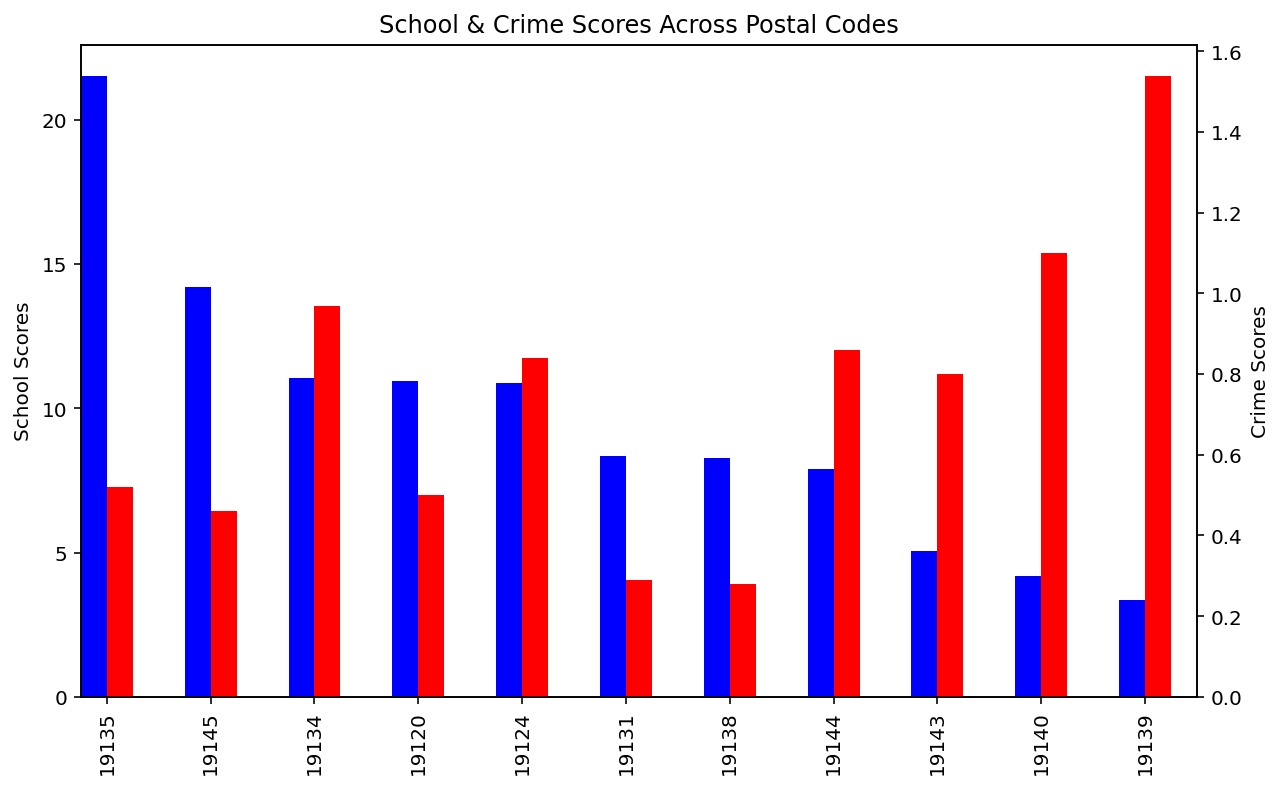

In [59]:
#Show relationship between education score and postal code using a bar graph
#create a new dataframe with the data needed

#create a new dataframe that contains the school score for each postal code and remove any duplicates
test = properties_df.sort_values('School_Score', ascending=False)
test = test.drop_duplicates(subset='School_Score', keep='first')
test = test[['Postal Code','School_Score']]

%config InlineBackend.figure_format = 'retina'

postal_labels = test['Postal Code'].tolist()
pl = [str(x) for x in postal_labels]

score_values = test['School_Score'].tolist()

plt.bar(pl, score_values)
plt.title('School Scores Across Postal Codes')
plt.xlabel('Postal Codes')
plt.ylabel('School Scores')
plt.show()


test1 = properties_df.sort_values('Crime_Rate_V', ascending=False)
test1 = test1.drop_duplicates(subset='Crime_Rate_V', keep='first')
test1 = test1[['Postal Code','Crime_Rate_V']]

merged_df = pd.merge(test, test1)


#second bar graph
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.25

merged_df.School_Score.plot(kind='bar', color='blue', ax=ax, width=width, position=1)
merged_df.Crime_Rate_V.plot(kind='bar', color='red', ax=ax2, width=width, position=0)


ax.set_ylabel('School Scores')
ax2.set_ylabel('Crime Scores')

plt.title('School & Crime Scores Across Postal Codes')
plt.xlabel('Postal Codes')

labels_postal = merged_df['Postal Code'].tolist()
ticks9 = range(0,len(labels_postal))
plt.xticks(ticks9, labels_postal);
plt.show()

Understanding what locations have the highest school scores are important for investors given that property values tend to rise when the education system is better. The reason being is because of how the education system is funded in the United States. Every public school receives funds from local property taxes, thus the higher the property value, the higher the property tax. When schools receive more funds, they are more likely to have better resources such as teachers, learning materials, and technology, all of which positively impact the quality of education. From the graphs above, it is evident School Score and Crime Scores are inversely related. Locations with high School Scores tended to have low Crime Scores and visa-versa. Logically, this makes sense because areas known for crime have poor education systems.

### 4.5. Tax Assessed Property Value Across Postal Areas


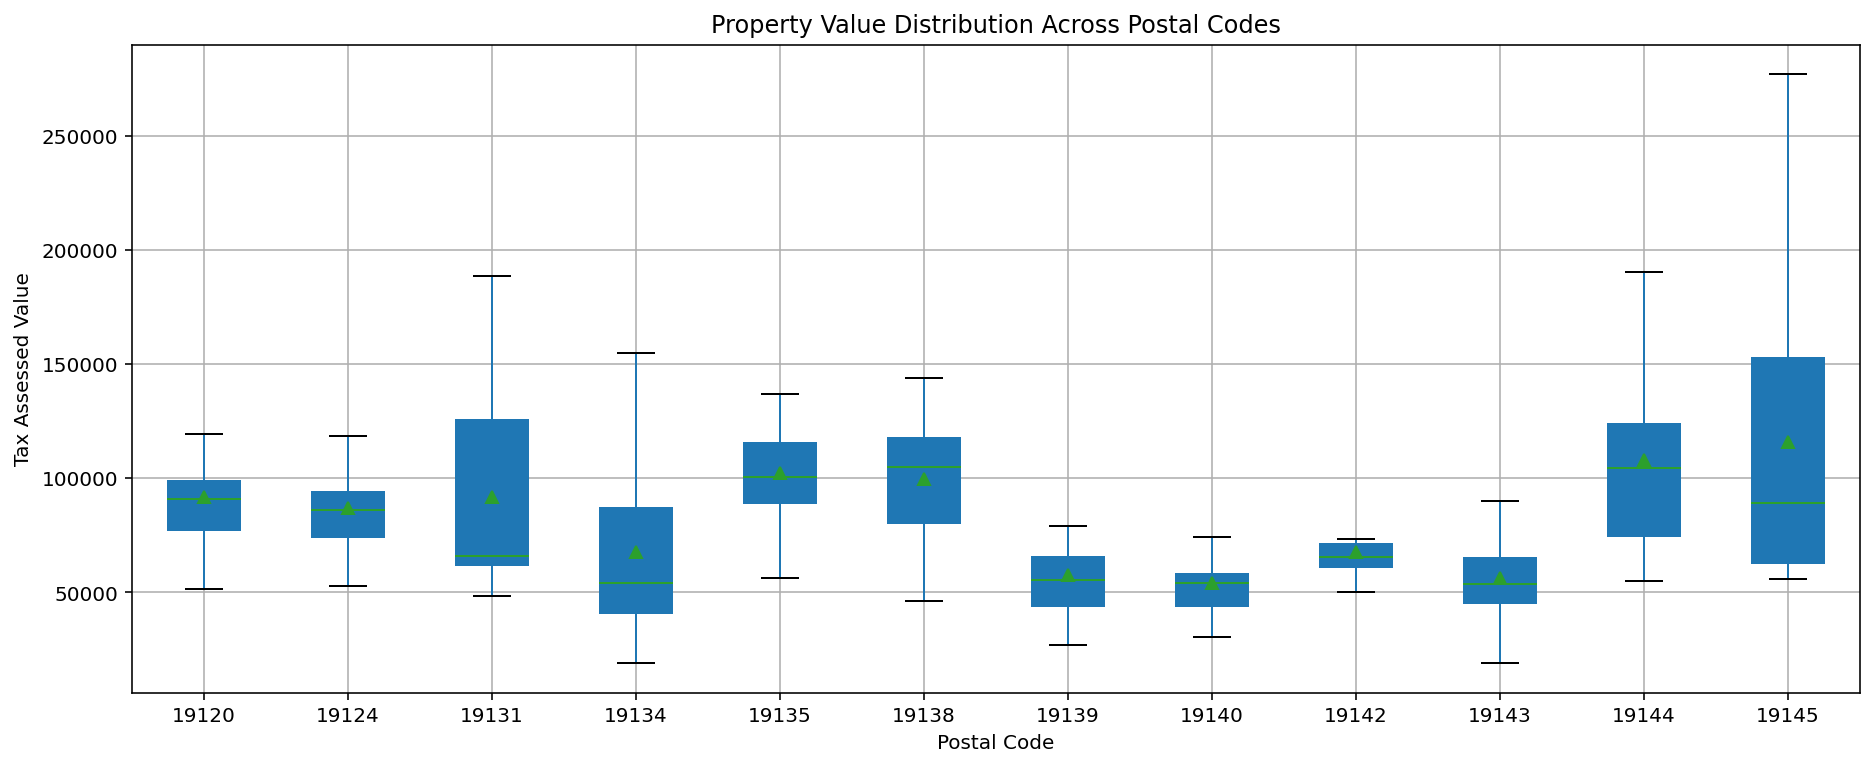

In [380]:
#whisker plots allow us to see the distribution among the tax assessed properties in each area code

property_value_dist = properties_df.boxplot(by ='Postal Code', column =['taxAssessment'], patch_artist=True, grid = True,showfliers=False,showmeans=True);
property_value_dist.set_title('Property Value Distribution Across Postal Codes');
plt.suptitle("")
property_value_dist.set_xlabel('Postal Code');
property_value_dist.set_ylabel('Tax Assessed Value');
plt.rcParams["figure.figsize"] = [10, 6]

%config InlineBackend.figure_format = 'retina'


The postal codes with the one of the highest tax assessed median values were 19135 and 19144, at slightly over $100,000. What could possibily explain this is that postal code 19144 contains the most Single Family and Multi-Family properties, of which happen to be the top two most expensives types. However, what is interesting is that 19144 had a relatively high Crime Rate Score and an average tax assessed value higher than its median. If Crime Scores are 'larger' than School Scores, but the average tax assessed property value is greater than the median, that could signal signs of gentrification because the value of some properties increase the average. For context, gentrification occurs when poor urban areas are changed by the fact that wealthier people are moving in, improving housing, and attracting new businesses, and more often, than not, displacing current inhabitants in the process. Finally, as for postal code 19135, this area had the highest School Score out of all the postal codes in the dataset and relatively 'low' Crime Scores.

## 5. Model Creation for Predictive Analysis

The linear regression model attempted to predict the tax assessed value of a property given a set of relevant variables from the dataset, as well as explain the statistical significance of the variables. The Tax Assessed Value of a property was used because it is a conservative measure, given that this value is usually lower than the market value. However, before applying any statistical tools, the input variables needed to be transformed and added in such a way that the model could interpret.

### 5.1. Variable Assignment & Creation

From the dataset, the property age variable was derived from the "yearBuilt" and "Sale Date" variables because the age of a property could impact the Tax Assessed Value.


In [108]:
#split the dataframe into x and y variables
og_x_variables = properties_df.iloc[:,0:-1]
dependentVariable = properties_df.iloc[:,-1:]

#assign the Tax Assessed Values to the dependentVariable that will be referenced in the analysis 
dependentVariable

,taxAssessment
2,190300.0
3,118300.0
4,113700.0
7,114800.0
9,70500.0
...,...
607,32400.0
608,29400.0
611,43900.0
613,65700.0


In [109]:
#Create a variable for age of property. Given that every property in the dataset was sold in 2016, it can be easily changed 
og_x_variables['Sale Date'] = 2016
og_x_variables['Property_Age'] = og_x_variables['Sale Date'] - og_x_variables['yearBuilt']
og_x_variables 


,Postal Code,Size_SqFt,PropType,bathrooms,bedrooms,yearBuilt,Sale Date,Crime_Rate_V,School_Score,Walk_Transit_Score,Sheriff Cost,Opening Bid,Zillow Estimate,Property_Age
2,19144,1882.0,SingleFamily,3.0,3,2006.0,2016,0.86,7.89,71.75,1337.33,12600.0,186172.0,10.0
3,19144,1792.0,SingleFamily,1.0,4,1900.0,2016,0.86,7.89,71.75,1459.76,9200.0,168557.0,116.0
4,19144,1419.0,SingleFamily,2.0,3,1925.0,2016,0.86,7.89,71.75,1263.36,8900.0,135045.0,91.0
7,19131,1354.0,SingleFamily,1.0,3,1925.0,2016,0.29,8.34,65.75,1286.45,10000.0,155873.0,91.0
9,19142,992.0,Condominium,1.0,3,1925.0,2016,0.84,7.28,76.50,1412.47,7100.0,96713.0,91.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,19139,1209.0,Condominium,1.0,3,1920.0,2016,1.54,3.34,80.08,2414.75,6500.0,47067.0,96.0
608,19134,984.0,Townhouse,1.0,3,1910.0,2016,0.97,11.05,71.25,2550.00,5800.0,41878.0,106.0
611,19139,1238.0,Townhouse,1.0,3,1925.0,2016,1.54,3.34,80.08,2566.47,64800.0,59447.0,91.0
613,19131,3096.0,SingleFamily,2.0,6,1925.0,2016,0.29,8.34,65.75,5736.40,15400.0,83447.0,91.0


### 5.2. One-Hot Encoding & Dataframe Merging


From the dataset, the variables "PropType" and "Postal Code" are categorial and were hot-encoded. When performing linear regression on categorical variables, one must follow the "n -1" concept, where n represents the number of categories that a specific variable holds. For example, the variable "PropType" contains the following n (4) categories: SingleFamily, Condominium, Multi-Family, and Townhouse. 

To use this variable, it is necessary to establish the starting point. Thus, the model will assume that the property is a Single Family home and located in the 19144 Postal Code. This means that the model will have 4-1 = 3 'dummy' variables to represent the "PropType" variable. The 3 'dummy' variables are (Condominium, Multi-Family, and Townhouse), of which hold binary values, where 0 means that the property does not pertain to that particular property type. The same concept applies to the categories of the "Postal Code" variable.

Once these 'dummy' variables are created, they need to be merged back into the dataframe that will be inputted into the linear regression model.

In [110]:
prop_one_hot = pd.get_dummies(og_x_variables['PropType'])
prop_one_hot.pop('SingleFamily')


2      1
3      1
4      1
7      1
9      0
      ..
607    0
608    0
611    0
613    1
804    0
Name: SingleFamily, Length: 394, dtype: uint8

In [111]:
#one hot encoding for each categorical type for property type, excluding the single family homes
prop_one_hot.head()

,Condominium,MultiFamily2To4,Townhouse
2,0,0,0
3,0,0,0
4,0,0,0
7,0,0,0
9,1,0,0


In [112]:
postal_one_hot = pd.get_dummies(og_x_variables['Postal Code'])
postal_one_hot.pop(19144)


2      1
3      1
4      1
7      0
9      0
      ..
607    0
608    0
611    0
613    0
804    0
Name: 19144, Length: 394, dtype: uint8

In [113]:
#one hot encoding for each categorical type for postal code, excluding the 19144 postal code
postal_one_hot.shape

(394, 11)

In [114]:
#merge the dataframes to the properties_df dataframe
og_x_variables = og_x_variables.merge(prop_one_hot, left_index=True, right_index=True)
og_x_variables = og_x_variables.merge(postal_one_hot, left_index=True, right_index=True)
og_x_variables


,Postal Code,Size_SqFt,PropType,bathrooms,bedrooms,yearBuilt,Sale Date,Crime_Rate_V,School_Score,Walk_Transit_Score,...,19124,19131,19134,19135,19138,19139,19140,19142,19143,19145
2,19144,1882.0,SingleFamily,3.0,3,2006.0,2016,0.86,7.89,71.75,...,0,0,0,0,0,0,0,0,0,0
3,19144,1792.0,SingleFamily,1.0,4,1900.0,2016,0.86,7.89,71.75,...,0,0,0,0,0,0,0,0,0,0
4,19144,1419.0,SingleFamily,2.0,3,1925.0,2016,0.86,7.89,71.75,...,0,0,0,0,0,0,0,0,0,0
7,19131,1354.0,SingleFamily,1.0,3,1925.0,2016,0.29,8.34,65.75,...,0,1,0,0,0,0,0,0,0,0
9,19142,992.0,Condominium,1.0,3,1925.0,2016,0.84,7.28,76.50,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,19139,1209.0,Condominium,1.0,3,1920.0,2016,1.54,3.34,80.08,...,0,0,0,0,0,1,0,0,0,0
608,19134,984.0,Townhouse,1.0,3,1910.0,2016,0.97,11.05,71.25,...,0,0,1,0,0,0,0,0,0,0
611,19139,1238.0,Townhouse,1.0,3,1925.0,2016,1.54,3.34,80.08,...,0,0,0,0,0,1,0,0,0,0
613,19131,3096.0,SingleFamily,2.0,6,1925.0,2016,0.29,8.34,65.75,...,0,1,0,0,0,0,0,0,0,0


### 5.3. Pre-Processing Dataframe
The initial variables that were used to create the "Property_age" and 'dummy' variables were removed from the dataframe. In addition, the variables that had missing values were addressed in a logical manner, using fill-in techniques.


In [115]:
#run once since this is altering the dataframe

#remove the irrelevant columns
og_x_variables.pop('yearBuilt')
og_x_variables.pop('Sale Date')
og_x_variables.pop('PropType')
og_x_variables.pop('Postal Code')

2      19144
3      19144
4      19144
7      19131
9      19142
       ...  
607    19139
608    19134
611    19139
613    19131
804    19143
Name: Postal Code, Length: 394, dtype: int32

In [119]:
#check to see if the input variables have the correct data type for the model
og_x_variables.dtypes

Size_SqFt             float64
bathrooms             float64
bedrooms                int32
Crime_Rate_V          float64
School_Score          float64
Walk_Transit_Score    float64
Sheriff Cost          float64
Opening Bid           float64
Zillow Estimate       float64
Property_Age          float64
Condominium             uint8
MultiFamily2To4         uint8
Townhouse               uint8
19120                   uint8
19124                   uint8
19131                   uint8
19134                   uint8
19135                   uint8
19138                   uint8
19139                   uint8
19140                   uint8
19142                   uint8
19143                   uint8
19145                   uint8
dtype: object

In [120]:
#before inputting x variables in the model, check to see what variables have missing values
og_x_variables.isna().sum()

Size_SqFt             0
bathrooms             0
bedrooms              0
Crime_Rate_V          0
School_Score          0
Walk_Transit_Score    0
Sheriff Cost          0
Opening Bid           4
Zillow Estimate       0
Property_Age          0
Condominium           0
MultiFamily2To4       0
Townhouse             0
19120                 0
19124                 0
19131                 0
19134                 0
19135                 0
19138                 0
19139                 0
19140                 0
19142                 0
19143                 0
19145                 0
dtype: int64

In [121]:
#opening bid has 4 missing values, thus they will be filled with values that reflect the median of all the values in the dataset
median_value=og_x_variables['Opening Bid'].median()
  
# mean of values in the same column
og_x_variables['Opening Bid'].fillna(value=median_value, inplace=True)

#check to see if there are still any missing values left
og_x_variables.isna().sum()

Size_SqFt             0
bathrooms             0
bedrooms              0
Crime_Rate_V          0
School_Score          0
Walk_Transit_Score    0
Sheriff Cost          0
Opening Bid           0
Zillow Estimate       0
Property_Age          0
Condominium           0
MultiFamily2To4       0
Townhouse             0
19120                 0
19124                 0
19131                 0
19134                 0
19135                 0
19138                 0
19139                 0
19140                 0
19142                 0
19143                 0
19145                 0
dtype: int64

## 6. Model Output & Interpretation
A linear regression model was applied to the clean, Real-Estate dataframe to calculate Tax Assessed Property Values.

### 6.1. Results


In [122]:
import statsmodels.api as sm 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#split the dataset into training and testing sets so that the last 10% of values are used for testing
X_train, X_test, y_train, y_test = train_test_split(og_x_variables, dependentVariable, test_size=0.4,shuffle=False)


# define the independent variables and make sure to add the intercept (constant) 
X_train = sm.add_constant(X_train)

X_test = sm.add_constant(X_test)


# construct the model and fit the TRAINING data again but WITHOUT the 5DayMA binary variables 
lin_reg_train = sm.OLS(y_train, X_train).fit() 

print(lin_reg_train.summary())

                            OLS Regression Results                            
Dep. Variable:          taxAssessment   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     31.91
Date:                Fri, 16 Jul 2021   Prob (F-statistic):           2.35e-54
Time:                        15:02:31   Log-Likelihood:                -2612.3
No. Observations:                 236   AIC:                             5269.
Df Residuals:                     214   BIC:                             5345.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               4787.8979   1834

### 6.2. Interpretation

The regression model has an Adjusted R-squared of 0.733, which is relatively high. This can be interpreted as follows: 73% of the variance in the target variable can be explained by the independent variables. It measures the strength of the relationship between the model and the dependent variable on a 0 – 100% scale. 

Moreover, understanding what variables might be significant in predicting Tax Assessed Property Values can be determined via the P-Value of each variable. This analysis assumed a P-Value of less than 0.05 to be statistically signifcant. The following variables match that criteria:

- Amount of bathrooms
- Zillow Estimate 
- Whether the property is a Townhouse or Multi-Family Unit
- Whether the property is located in the following Postal Codes of Philadelphia
    - 19134
    - 19139
    - 19140
    - 19142
    - 19143
 

## 7. Tax Assessed Value Prediction

There is an important distinction between the results of the linear regression model, and its ability to predict Tax Asessed Value accurately. To properly determine the model accuracy, the real-estate investor has to establish a risk-tolerance based on percentage points. In this case, the model's accuracy was determined based on its ability to predict the Tax Assessed Value within a plus or minus 12.5 percent variance. For example, if a Tax Assessed Value is 100,000 USD and the model predicted somewhere between 87,500 USD and 112,500 USD, the analysis will deem the model to be accurate. It is important to note that the variance percentage is an arbitrary number that can be changed depending on an investor's risk tolerance.

In [126]:
# performing predictions on the TRAINING datdaset 
modelPredictions = lin_reg_train.predict(X_train)

#returns the model predictions for the training data and rounds down to 0 or rounds up to 1
modelPredictionList = list(map(round, modelPredictions)) 

y_train_values = y_train['taxAssessment'].tolist()

#create a dataframe that contains the predictions and actual results for the training section
training_data= {'Prediction': modelPredictionList, 'Tax Assessed Property Value':y_train_values}
training_results = pd.DataFrame.from_dict(training_data)
training_results.head(10)

,Prediction,Tax Assessed Property Value
0,155832,190300.0
1,136449,118300.0
2,121747,113700.0
3,122358,114800.0
4,76813,70500.0
5,89757,101300.0
6,116186,127800.0
7,64400,64400.0
8,91461,100800.0
9,98604,93900.0


In [128]:
#add the accuracy column
training_results['Deviation'] = (training_results['Tax Assessed Property Value']/training_results['Prediction']-1) 

#add the accuracy column
training_results['Accuracy'] = training_results['Deviation'].apply(lambda x: 'Accurate' if x >= -0.125 and x <= 0.125  else 'Inaccurate')

training_results.head(10)

,Prediction,Tax Assessed Property Value,Deviation,Accuracy
0,155832,190300.0,0.221187,Inaccurate
1,136449,118300.0,-0.133009,Inaccurate
2,121747,113700.0,-0.066096,Accurate
3,122358,114800.0,-0.061770,Accurate
4,76813,70500.0,-0.082187,Accurate
5,89757,101300.0,0.128603,Inaccurate
6,116186,127800.0,0.099960,Accurate
7,64400,64400.0,0.000000,Accurate
8,91461,100800.0,0.102109,Accurate
9,98604,93900.0,-0.047706,Accurate


In [129]:
print(training_results['Accuracy'].value_counts())
print()
training_accuracy = training_results['Accuracy'].value_counts()[0]/(training_results['Accuracy'].value_counts()[0] +training_results['Accuracy'].value_counts()[1])

print('The Training Accuracy of this Linear Regression Model is:',round(training_accuracy*100,2),'%')

Accurate      130
Inaccurate    106
Name: Accuracy, dtype: int64

The Training Accuracy of this Linear Regression Model is: 55.08 %


In [131]:
# performing predictions on the TESTING dataset 
modelTestPredictions = lin_reg_train.predict(X_test)
modelTestPredictions

#returns the model predictions for the testing data
modelTestPredictionList = list(map(round, modelTestPredictions)) 

y_test_values = y_test['taxAssessment'].tolist()


#create a dataframe that contains the predictions and actual results
testing_data= {'Prediction': modelTestPredictionList, 'Tax Assessed Property Value':y_test_values}
test_results = pd.DataFrame.from_dict(testing_data)
test_results.head(10)

,Prediction,Tax Assessed Property Value
0,53980,69800.0
1,57694,58400.0
2,68003,67700.0
3,95444,116100.0
4,59786,65800.0
5,77953,74400.0
6,48232,54600.0
7,43617,44500.0
8,116161,135800.0
9,84323,92500.0


In [133]:
#add the accuracy column
test_results['Deviation'] = (test_results['Tax Assessed Property Value']/test_results['Prediction']-1) 

#add the accuracy column
test_results['Accuracy'] = test_results['Deviation'].apply(lambda x: 'Accurate' if x >= -0.125 and x <= 0.125  else 'Inaccurate')

test_results.head(10)

,Prediction,Tax Assessed Property Value,Deviation,Accuracy
0,53980,69800.0,0.293072,Inaccurate
1,57694,58400.0,0.012237,Accurate
2,68003,67700.0,-0.004456,Accurate
3,95444,116100.0,0.216420,Inaccurate
4,59786,65800.0,0.100592,Accurate
5,77953,74400.0,-0.045579,Accurate
6,48232,54600.0,0.132029,Inaccurate
7,43617,44500.0,0.020244,Accurate
8,116161,135800.0,0.169067,Inaccurate
9,84323,92500.0,0.096972,Accurate


In [134]:
#print out the results for each set of data
test_accuracy = test_results['Accuracy'].value_counts()[0]/(test_results['Accuracy'].value_counts()[0] +test_results['Accuracy'].value_counts()[1])

print('The Testing Accuracy of this Linear Regression Model is:',round(test_accuracy*100,2),'%')
print()
print('The Training Accuracy of this Linear Regression Model is:',round(training_accuracy*100,2),'%')
print()

#avg out the accuracies
print('The Overall Accuracy of this Linear Regression Model is:',round((training_accuracy+test_accuracy)/2*100,2),'%')


The Testing Accuracy of this Linear Regression Model is: 56.96 %

The Training Accuracy of this Linear Regression Model is: 55.08 %

The Overall Accuracy of this Linear Regression Model is: 56.02 %


## 8. Conclusion

After conducting a linear regression analysis on the real-estate data from Philadelphia properties, it was apparent that certain variables exist that help predict tax assessed property values. Although the model was only 56.02 % accurate on the test dataset, an investor could still benefit from the findings given that it could be used concurrently with fundamental analysis. The shortcomings of the process were that the data was limited to sales of 2016 and only linear regression was used. Going forward, more recent data should be used to reflect current market conditions and more analytical methods such as logistic regression and Navie Bayes Classifier, should be applied. Finally, what I learned during this project was the importance of creating narative with Descriptive Analytics to better explain the Predictive Analytics component.